In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

transt = transforms.ToTensor()
transp = transforms.ToPILImage()
img_t = transt(Image.open('ffhq128/00001.png'))
img_t = torch.unsqueeze(img_t, 0) 

patch_size = 16
num_patches = img_t.shape[2] // patch_size

def scramble(img_batch, patch_size):
    bs, ch, w, h = img_batch.shape
    patches = img_batch.unfold(1, 3, 3).unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
    patch_dim_0 = patches.shape[2]
    patch_dim_1 = patches.shape[3]
    r = torch.randperm(patch_dim_0)
    c = torch.randperm(patch_dim_1)
    scramble_patches = patches[:, :,r[:, None], c, :, :, :]
    scramble_img_batch = torch.reshape(torch.swapaxes(torch.squeeze(torch.swapaxes(scramble_patches, 1, 4), dim=4), 3,4)
                                        , shape=(bs, ch, w, h))
    return scramble_img_batch, scramble_patches

def visualize_scramble(img):
    # Single Image Visualisation
    
    plt.imshow(transp(img[0]))

    # Grid Visualisation
    # """Imshow for Tensor."""    
    # fig = plt.figure(figsize=(num_patches, num_patches))
    # for i in range(num_patches):
    #     for j in range(num_patches):
    #         inp = transp(patches[0][0][i][j])
    #         inp = np.array(inp)

    #         ax = fig.add_subplot(num_patches, num_patches, ((i*num_patches)+j)+1, xticks=[], yticks=[])
    #         plt.imshow(inp)

/home/bias-team/anaconda3/envs/diffuse_vae/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


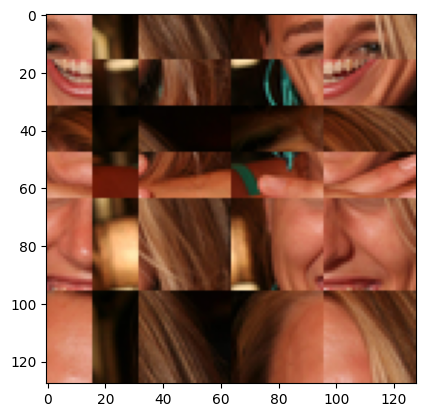

In [2]:
img, scramble_patches = scramble(img_t, patch_size)
visualize_scramble(img)


In [145]:
# fold = nn.Fold(output_size=(4, 5), kernel_size=(2, 2))
# input = torch.randn(1, 3 * 2 * 2, 12)
# print(input.shape)
# output = fold(input)
# output.shape

torch.Size([1, 3, 2, 2, 64, 64])
torch.Size([1, 3, 2, 64, 2, 64])
torch.Size([1, 3, 128, 128])


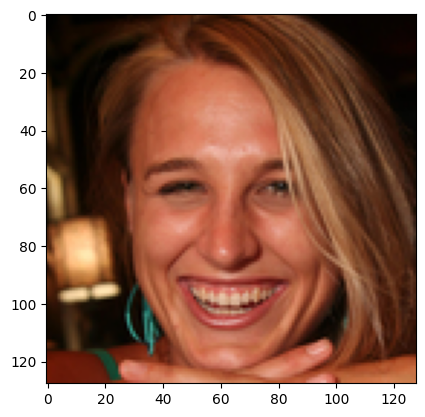

In [186]:
bs=1
patches = img_t.unfold(1, 3, 3).unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
patches = torch.squeeze(torch.swapaxes(patches, 1, 4), dim=4)
print(patches.shape)
patches = torch.swapaxes(patches, 3, 4)
# patches = torch.swapaxes(patches, 2, 5)
print(patches.shape)
img = torch.reshape(patches, shape=(bs, 3, 128,128))
print(img.shape)
# IR = F.fold(patches, output_size=(128, 128), kernel_size=patch_size, stride=patch_size)
# IR = IR.squeeze()

# patches = patches.permute(0, 1, 3, 2)
# patches = patches.contiguous().view(1, kernel_size*kernel_size, -1)
# IR = F.fold(patches, output_size=(256, 256), kernel_size=kernel_size, stride=stride)
# IR = IR.squeeze()

# bs = patches.shape[0]
# print(patches.shape)
# img = torch.squeeze(torch.swapaxes(patches, 1, 4), dim=4)
# img_r = img[:, 0, :, :, :, :]
# img_g = img[:, 1, :, :, :, :]
# img_b = img[:, 2, :, :, :, :]
# print(img.shape)
# img = torch.reshape(img, shape=(bs, 3, 2, 2, 64, 64))
# print(img.shape)

plt.imshow(transp(img[0]))

torch.Size([3, 128, 128])